In [ ]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from text_preprocessing import prepare_sentence
from skops.io import dump
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Load raw CAPEC data
df = pd.read_excel('data/raw_capec_data.xlsx', sheet_name="Threats")
df["NameDesc"] = df["Name"] + " " + df["Desc"]
df['NameDesc'] = df['NameDesc'].astype(str)

# Preprocessing (removing stopwords, stemming, etc.)
corpus = df['NameDesc'].apply(prepare_sentence)

# Feature extraction using the pre-trained TF-IDF vectorizer
with open('model/vectorizer.pickle', 'rb') as fin:
    tfidf = pickle.load(fin)

X = tfidf.transform(corpus).toarray()

In [ ]:
# Unsupervised model (Gaussian Mixture Model)
num_clusters = 5
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
labels = gmm.fit_predict(X)

# Print full data associated with each cluster
# for cluster_id in range(num_clusters):
#     cluster_data = df.loc[labels == cluster_id]
#     print(f"\nCluster {cluster_id} Samples:")
#     print(cluster_data)

for cluster_id in range(num_clusters):
    cluster_data = df.loc[labels == cluster_id]
    file_name = f'Cluster_{cluster_id}_data.xlsx'
    cluster_data.to_excel(file_name, index=False)
    print(f"Cluster {cluster_id} data saved to {file_name}")


cluster 2: 27/76 not 10000, 13 cluster4
cluster 4: 17/67 not 00001

In [ ]:
# Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"\nSilhouette Score: {silhouette_avg}")

# Visualization (using PCA)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X)

# Scatter plot with colors based on cluster labels
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram
from text_preprocessing import prepare_sentence
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load raw CAPEC data
df = pd.read_excel('data/raw_capec_data.xlsx', sheet_name="Threats")
df["NameDesc"] = df["Name"] + " " + df["Desc"]
df['NameDesc'] = df['NameDesc'].astype(str)

# Preprocessing (removing stopwords, stemming, etc.)
corpus = df['NameDesc'].apply(prepare_sentence)

# Feature extraction using the pre-trained TF-IDF vectorizer
with open('model/vectorizer.pickle', 'rb') as fin:
    tfidf = pickle.load(fin)

X = tfidf.transform(corpus).toarray()

# Hierarchical clustering and dendrogram
linked = linkage(X, 'ward')  # You can use different linkage methods based on your requirements

# Visualization of the dendrogram
plt.figure(figsize=(60, 42), dpi=175)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from text_preprocessing import prepare_sentence
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load raw CAPEC data
df = pd.read_excel('data/raw_capec_data.xlsx', sheet_name="Threats")
df["NameDesc"] = df["Name"] + " " + df["Desc"]
df['NameDesc'] = df['NameDesc'].astype(str)

# Preprocessing (removing stopwords, stemming, etc.)
corpus = df['NameDesc'].apply(prepare_sentence)

# Feature extraction using the pre-trained TF-IDF vectorizer
with open('model/vectorizer.pickle', 'rb') as fin:
    tfidf = pickle.load(fin)

X = tfidf.transform(corpus).toarray()

# Hierarchical clustering
linked = linkage(X, 'ward')  # You can use different linkage methods based on your requirements

# Assign clusters using the fcluster function
clusters = fcluster(linked, t=9, criterion='distance')

# Create a DataFrame with the original data, cluster assignments, and colors
cluster_data = pd.DataFrame({'Data': df['NameDesc'], 'Cluster': clusters})
cluster_data.to_excel('cluster_data.xlsx', index=False)

# Visualization of the dendrogram with cluster labels
plt.figure(figsize=(60, 22), dpi=150)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Add cluster labels to the plot
plt.title('Hierarchical Clustering Dendrogram with Cluster Labels')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load raw data
df = pd.read_excel('data/mitre-classified.xlsx', sheet_name="Threats")

# Preprocessing (removing stopwords, stemming, etc.)
corpus = df['NameDesc'].apply(prepare_sentence)

# Feature extraction using the pre-trained TF-IDF vectorizer
with open('model/vectorizer.pickle', 'rb') as fin:
    tfidf = pickle.load(fin)

X = tfidf.transform(corpus).toarray()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ground truth labels
y_true = df['STRIDE'].values

N_CLUST = 5
model = AgglomerativeClustering(n_clusters=N_CLUST)
y_pred = model.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

<h3>Classification<h3>

In [ ]:
# !pip install -U scikit-learn scipy matplotlib seaborn tensorflow keras gensim pydot
# !brew install graphviz

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools

# from text_preprocessing import prepare_sentence

import tensorflow as tf
import keras.backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import Sequence, to_categorical, plot_model
from tensorflow.keras.layers import Embedding, Reshape, GlobalMaxPooling1D, Bidirectional, Dropout, Lambda
from tensorflow.keras.layers import LSTM, Dense, Flatten, Activation, RepeatVector, Permute, Multiply
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import LambdaCallback

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim.downloader

In [2]:
w2v = gensim.downloader.load('word2vec-google-news-300')

In [3]:
import nltk
from nltk import SnowballStemmer, word_tokenize
import neattext.functions as nfx
from nltk.stem import 	WordNetLemmatizer
import string
nltk.download('averaged_perceptron_tagger')

wordnet_lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
translate_table = dict((ord(char), None) for char in string.punctuation)


def stemming(sentence):
    """
    Stemming function to stem the document to it's root
    :param sentence:
    :return:
    """
    stemSentence = ""
    for word in sentence.split():
        stemSentence += stemmer.stem(word)
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


def lemmatize(sentence):
    lemmSentence = ""
    for w in word_tokenize(sentence):
        lemmSentence += wordnet_lemmatizer.lemmatize(w)
        lemmSentence += " "
    lemmSentence = lemmSentence.strip()
    return lemmSentence


def pos_tags(sentence):
    pos_tags = nltk.pos_tag(word_tokenize(sentence))

    taggedSentence = ""
    for w, tag in pos_tags:
        taggedSentence += w
    for w, tag in pos_tags:
        taggedSentence += tag

    return taggedSentence


def prepare_sentence(sentence):
    s = sentence.lower()
    #s = s.translate(translate_table)
    #s = pos_tags(s)
    s = nfx.remove_stopwords(s)
    s = stemming(s)
    #s = lemmatize(s)
    return s

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chufeng/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
# Preprocessing
df = pd.read_excel('data/mitre-classified.xlsx')

df_train, temp = train_test_split(df, test_size=0.3, random_state=42)
df_test, df_dev = train_test_split(temp, test_size=1/3, random_state=42)

col_toDrop = ['Ref', 'Name', 'Desc', 'Confidentiality', 'Integrity', 'Availability', 'Ease Of Exploitation', 'References', 'Unnamed: 0']
df_train = df_train.reset_index(drop=True).drop(columns=col_toDrop)
df_test = df_test.reset_index(drop=True).drop(columns=col_toDrop)
df_dev = df_dev.reset_index(drop=True).drop(columns=col_toDrop)

df_train['NameDesc'].apply(prepare_sentence)
df_test['NameDesc'].apply(prepare_sentence)
df_dev['NameDesc'].apply(prepare_sentence)

def text_preprocessing(df):
    df['NameDesc'] = df['NameDesc'].str.replace("[^A-Za-z]", " ", regex=True)
    df['NameDesc'] = df['NameDesc'].str.replace("\s+", " ", regex=True)
    df['NameDesc'] = df['NameDesc'].str.replace("http\S+", "", regex=True)
    df['NameDesc'] = df['NameDesc'].str.replace("\(Citation:.*?\)", "", regex=True)
    df['NameDesc'] = df['NameDesc'].str.replace("<.*?>", " ", regex=True)
    df['NameDesc'] = df['NameDesc'].str.replace(r"\(Citation:.*?\)", "", regex=True)
    df['NameDesc'] = df['NameDesc'].str.replace(r"<.*?>", "", regex=True)
    df['NameDesc'] = df['NameDesc'].str.replace(r"http\S+", "", regex=True)
    df['NameDesc'] = df['NameDesc'].apply(lambda x: " ".join(x.split()))
    return df

df_train = text_preprocessing(df_train)
# df_test = text_preprocessing(df_test)
df_dev = text_preprocessing(df_dev)

display(df_train.head(3))
display(df_test.head(3))
display(df_dev.head(3))

,NameDesc,STRIDE
0,Exfiltration to Cloud Storage Adversaries may ...,100
1,Netsh Helper DLL Adversaries may establish per...,1
2,Runtime Data Manipulation Adversaries may modi...,10000


,NameDesc,STRIDE
0,Domain Properties Adversaries may gather infor...,100000
1,Office Template Macros Adversaries may abuse M...,1
2,Process Doppelganging Adversaries may inject m...,1


,NameDesc,STRIDE
0,Web Services Adversaries may register for web ...,10
1,Domains Adversaries may hijack domains and or ...,100000
2,Link Target Adversaries may put in place resou...,100000


In [5]:
def change_label(df):
    stride_mapping = { # STRIDE
        1: 1, # E
        10: 2, # D
        100: 3, # I
        1000: 4, # R
        10000: 5, # T
        100000: 0, # S
        11000: 4,
        100100: 0
    }
    df['STRIDE'] = df['STRIDE'].map(stride_mapping)

while True:
    df_train, temp = train_test_split(df, test_size=0.3)
    df_test, df_dev = train_test_split(temp, test_size=1/3)

    change_label(df_train)
    change_label(df_test)
    change_label(df_dev)

    c = set([0, 1, 2, 3, 4, 5])
    if set(df_train['STRIDE'].unique()) != c or \
        set(df_test['STRIDE'].unique()) != c or \
        set(df_dev['STRIDE'].unique()) != c:
            continue
    else:
        break

print(f"df_train:\n{df_train['STRIDE'].value_counts()}\n")
print(f"df_dev:\n{df_dev['STRIDE'].value_counts()}\n")
print(f"df_test:\n{df_test['STRIDE'].value_counts()}")

df_train:
STRIDE
1    146
3    111
5     44
0     28
2      7
4      3
Name: count, dtype: int64

df_dev:
STRIDE
1    23
3    16
5     7
0     1
2     1
4     1
Name: count, dtype: int64

df_test:
STRIDE
1    47
3    26
5    15
0     5
2     3
4     1
Name: count, dtype: int64


In [6]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df_train['NameDesc'])
X_train = tokenizer.texts_to_sequences(df_train['NameDesc'])
X_test = tokenizer.texts_to_sequences(df_test['NameDesc'])
X_val = tokenizer.texts_to_sequences(df_dev['NameDesc'])

x = [X_train, X_test, X_val]
max_length = 0
for _ in x:
    max_l = max([len(seq) for seq in _])
    max_length = max(max_length, max_l)

X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')
X_val_padded = pad_sequences(X_val, maxlen=max_length, padding='post')

y_train = df_train['STRIDE'].values
y_test = df_test['STRIDE'].values
y_val = df_dev['STRIDE'].values

In [7]:
embedding_dim = 10
hidden_units = 32
num_classes = 6
batch_size = 16
num_epochs = 50
classes = [0,1,2,3,4,5]
vocab_size = len(tokenizer.word_index) + 1

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(hidden_units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    ),
    tf.keras.layers.LSTM(hidden_units, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])

model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()
# plot_model(model, show_layer_names=True, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 978, 10)           57730     
                                                                 
 dropout (Dropout)           (None, 978, 10)           0         
                                                                 
 bidirectional (Bidirection  (None, 978, 64)           11008     
 al)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 6)                 1

In [8]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [9]:
hist = model.fit(
    X_train_padded, y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_val_padded, y_val),
    verbose=1,
    callbacks=[early_stop,]
)

Epoch 1/50
22/22 [==============================] - 19s 738ms/step - loss: 1.7670 - accuracy: 0.2861 - val_loss: 1.7234 - val_accuracy: 0.4694
Epoch 2/50
22/22 [==============================] - 16s 714ms/step - loss: 1.7145 - accuracy: 0.3599 - val_loss: 1.6638 - val_accuracy: 0.4694
Epoch 3/50
22/22 [==============================] - 15s 699ms/step - loss: 1.6558 - accuracy: 0.3953 - val_loss: 1.5925 - val_accuracy: 0.4694
Epoch 4/50
22/22 [==============================] - 15s 696ms/step - loss: 1.5822 - accuracy: 0.3481 - val_loss: 1.5175 - val_accuracy: 0.4694
Epoch 5/50
22/22 [==============================] - 16s 746ms/step - loss: 1.5173 - accuracy: 0.4012 - val_loss: 1.4560 - val_accuracy: 0.4694
Epoch 6/50
22/22 [==============================] - 17s 792ms/step - loss: 1.4565 - accuracy: 0.3953 - val_loss: 1.4077 - val_accuracy: 0.4694
Epoch 7/50
22/22 [==============================] - 18s 814ms/step - loss: 1.4113 - accuracy: 0.4425 - val_loss: 1.3522 - val_accuracy: 0.4694

In [10]:
def plot_graph(hist, model, X_val_padded, y_val, classes):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    y_val = np.nan_to_num(y_val, nan=0.0)
    y_pred = np.argmax(model.predict(X_val_padded), axis=1)
    cm = confusion_matrix(y_val, y_pred)
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

2/2 [==============================] - 1s 71ms/step


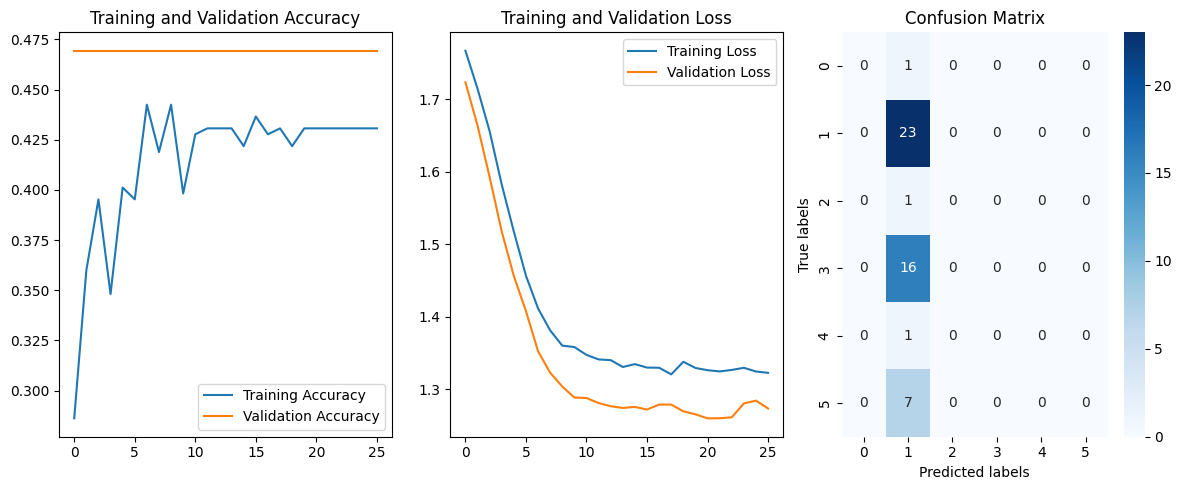

In [11]:
plot_graph(
    hist=hist,
    model=model,
    X_val_padded=X_val_padded,
    y_val=y_val,
    classes=classes
)

<h4>very bad accuracy.. try training without a validation set.<h4> => Did not work

Try using TFIDF instead of w2v to extract features

In [12]:
# Preprocessing
df = pd.read_excel('data/mitre-classified.xlsx')

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

col_toDrop = ['Ref', 'Name', 'Desc', 'Confidentiality', 'Integrity', 'Availability', 'Ease Of Exploitation', 'References', 'Unnamed: 0']
df_train = df_train.reset_index(drop=True).drop(columns=col_toDrop)
df_test = df_test.reset_index(drop=True).drop(columns=col_toDrop)

df_train['NameDesc'].apply(prepare_sentence)
df_test['NameDesc'].apply(prepare_sentence)

df_train = text_preprocessing(df_train)
df_test = text_preprocessing(df_test)

change_label(df_train)
change_label(df_test)

display(df_train.head(3))
display(df_test.head(3))

,NameDesc,STRIDE
0,Domains Adversaries may hijack domains and or ...,0
1,Port Knocking Adversaries may use port knockin...,3
2,Internet Connection Discovery Adversaries may ...,3


,NameDesc,STRIDE
0,Keylogging Adversaries may log user keystrokes...,3
1,Upload Malware Adversaries may upload malware ...,5
2,Authentication Package Adversaries may abuse a...,1


In [13]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['NameDesc']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(df_test['NameDesc']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(df_dev['NameDesc']).toarray()

y_train = df_train['STRIDE'].values
y_test = df_test['STRIDE'].values
y_val = df_dev['STRIDE'].values

In [14]:
hidden_units = 32
vocab_size = X_train_tfidf.shape[1]
optimizer = tf.keras.optimizers.legacy.Adam(1e-3)

model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(vocab_size,)),
    tf.keras.layers.Dense(hidden_units*2, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hidden_units, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hidden_units//2, activation='leaky_relu'),
    tf.keras.layers.Dense(num_classes, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-2), activation='softmax')
])

model2.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model2.summary()
# plot_model(model2, show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                363008    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                     

In [ ]:
hist2 = model2.fit(
    X_train_tfidf, y_train,
    batch_size=16,
    epochs=num_epochs,
    validation_data=(X_val_tfidf, y_val),
    verbose=1,
    callbacks=[early_stop,]
)

In [ ]:
plot_graph(
    hist=hist2,
    model=model2,
    X_val_padded=X_val_tfidf,
    y_val=y_val,
    classes=classes
)

Hyperparameter tuning

In [ ]:
# Preprocessing
df = pd.read_excel('data/mitre-classified.xlsx')

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

col_toDrop = ['Ref', 'Name', 'Desc', 'Confidentiality', 'Integrity', 'Availability', 'Ease Of Exploitation', 'References', 'Unnamed: 0']
df_train = df_train.reset_index(drop=True).drop(columns=col_toDrop)
df_test = df_test.reset_index(drop=True).drop(columns=col_toDrop)

df_train['NameDesc'].apply(prepare_sentence)
df_test['NameDesc'].apply(prepare_sentence)

df_train = text_preprocessing(df_train)
df_test = text_preprocessing(df_test)

change_label(df_train)
change_label(df_test)

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['NameDesc']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(df_test['NameDesc']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(df_dev['NameDesc']).toarray()

y_train = df_train['STRIDE'].values
y_test = df_test['STRIDE'].values
y_val = df_dev['STRIDE'].values

In [ ]:
dropout_rates = [0.2, 0.3, 0.4, 0.5]
activations_list = ['relu', 'leaky_relu', 'elu', 'tanh']
num_neurons = [32, 64, 128, 256]
opt_lr = [1e-2, 1e-3, 1e-4]
L2_lr = [1e-2, 1e-3, 1e-4]
best_params = None
best_val_acc = 0

hyperparam_combi = itertools.product(dropout_rates, num_neurons, activations_list, opt_lr, L2_lr)

for dr, nn, al, olr, l2lr in hyperparam_combi:
    modelTest = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(vocab_size,)),
    tf.keras.layers.Dense(nn*2, activation=al),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(nn, activation=al),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(nn//2, activation=al),
    tf.keras.layers.Dense(num_classes, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-2), activation='softmax')
    ])

    optimizer = tf.keras.optimizers.legacy.Adam(olr)
    modelTest.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    
    early_stop = EarlyStopping(
        monitor="val_loss",
        patience=5,
        verbose=0,
        restore_best_weights=True
    )
    histTest = modelTest.fit(
        X_train_tfidf, y_train,
        batch_size=16,
        epochs=num_epochs,
        validation_data=(X_val_tfidf, y_val),
        verbose=0,
        callbacks=[early_stop,]
    )

    val_acc = max(histTest.history['val_accuracy'])
    # print(f"Dropout: {dr}, Activation: {al}, Hidden Units: {nn}, L2 Reg: {l2lr}, LR: {olr}, Best Val Acc: {val_acc}\n===========================")
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params = (dr, nn, al, olr, l2lr)

In [ ]:
print(f"Final Best Hyperparameters: Dropout: {best_params[0]},\nActivation: {best_params[2]},\nHidden Units: {best_params[1]},\nL2 Reg: {best_params[4]},\nLR: {best_params[3]},\nBest Val Acc: {best_val_acc}")

In [15]:
# Preprocessing
df = pd.read_excel('data/mitre-classified.xlsx')

df_train, df_test = train_test_split(df, test_size=0.2, )

col_toDrop = ['Ref', 'Name', 'Desc', 'Confidentiality', 'Integrity', 'Availability', 'Ease Of Exploitation', 'References', 'Unnamed: 0']
df_train = df_train.reset_index(drop=True).drop(columns=col_toDrop)
df_test = df_test.reset_index(drop=True).drop(columns=col_toDrop)

df_train['NameDesc'].apply(prepare_sentence)
df_test['NameDesc'].apply(prepare_sentence)

df_train = text_preprocessing(df_train)
# df_test = text_preprocessing(df_test)

change_label(df_train)
# change_label(df_test)
change_label(df_dev)

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['NameDesc']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(df_test['NameDesc']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(df_dev['NameDesc']).toarray()

y_train = df_train['STRIDE'].values
y_test = df_test['STRIDE'].values
y_val = df_dev['STRIDE'].values

In [16]:
hidden_units = 32
num_classes = 6
batch_size = 16
num_epochs = 50
classes = [0,1,2,3,4,5]
vocab_size = X_train_tfidf.shape[1]
optimizer = tf.keras.optimizers.legacy.Adam(1e-4)

model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(vocab_size,)),
    tf.keras.layers.Dense(hidden_units*2, activation='elu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hidden_units, activation='elu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hidden_units//2, activation='elu'),
    tf.keras.layers.Dense(num_classes, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-3), activation='softmax')
])

model3.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model3.summary()
# plot_model(model3, show_shapes=True, show_layer_names=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                365184    
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 32)                128       
 chNormalization)                                     

In [17]:
hist3 = model3.fit(
    X_train_tfidf, y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_val_tfidf, y_val),
    verbose=1,
    callbacks=[early_stop,]
)

Epoch 1/50
25/25 [==============================] - 1s 6ms/step - loss: 2.0417 - accuracy: 0.2526 - val_loss: 1.8052 - val_accuracy: 0.2041
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 1.5507 - accuracy: 0.3943 - val_loss: 1.8156 - val_accuracy: 0.2245
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 1.2368 - accuracy: 0.5412 - val_loss: 1.8269 - val_accuracy: 0.2449
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 1.0079 - accuracy: 0.6495 - val_loss: 1.8325 - val_accuracy: 0.2449
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.8927 - accuracy: 0.6933 - val_loss: 1.8235 - val_accuracy: 0.2449
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.7791 - accuracy: 0.7552 - val_loss: 1.8273 - val_accuracy: 0.2653
Epoch 6: early stopping


4/4 [==============================] - 0s 875us/step


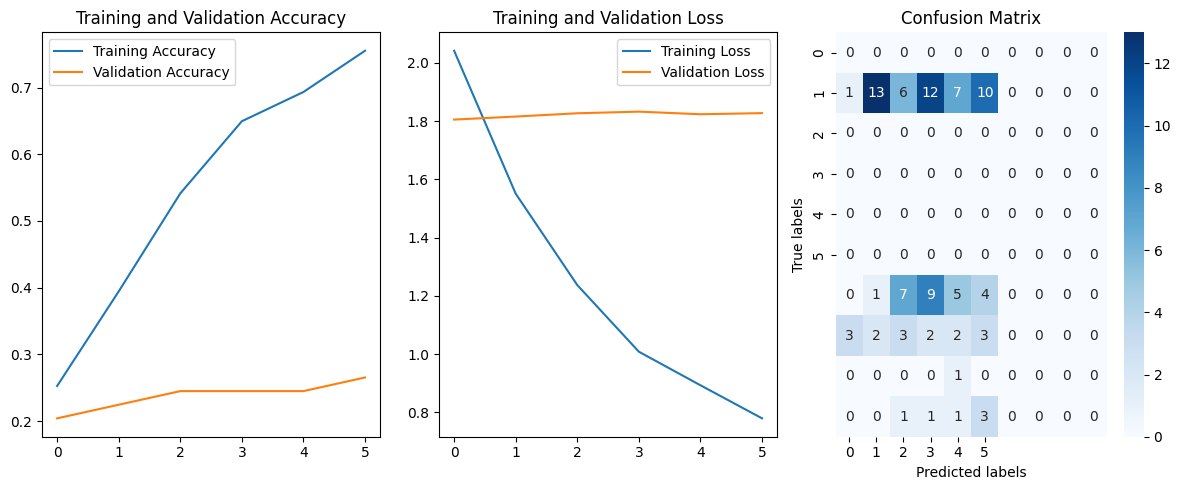

In [18]:
plot_graph(
    hist=hist3,
    model=model3,
    X_val_padded=X_test_tfidf,
    y_val=y_test,
    classes=classes
)

accuracy .85